In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Load and prepare the MNIST dataset. Convert the samples from integers to floating-point numbers:

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0                 # Converting to floating point numbers

11493376/11490434 [==============================] - 0s 0us/step


Examine the data

(28, 28) 5


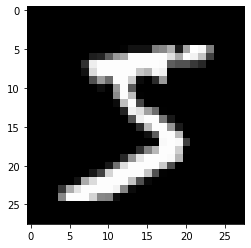

In [3]:
# get the first image and it's label
img1_arr, img1_label = x_train[0], y_train[0]
print (img1_arr.shape, img1_label)


# reshape first image(1 D vector) to 2D dimension image
img1_2d = np.reshape(img1_arr, (28, 28))

plt.subplot(111)
plt.imshow(img1_2d, cmap=plt.get_cmap('gray'))
plt.show()

Build the `tf.keras.Sequential model` by stacking layers. Choose an optimizer and loss function for training:

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

For each example the model returns a vector of "logits" or "log-odds" scores, one for each class.

In [5]:
predictions = model(x_train[:1]).numpy()
predictions


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[ 0.15439749, -1.1497827 ,  0.03874394,  0.5626492 ,  0.29200467,
        -0.40605628, -0.23469457,  0.01499612,  0.0746243 , -0.16505328]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to "probabilities" for each class:

In [6]:
tf.nn.softmax(predictions).numpy()

array([[0.11651936, 0.03162277, 0.10379356, 0.17526677, 0.13370886,
        0.06652673, 0.0789619 , 0.10135774, 0.10758533, 0.08465691]],
      dtype=float32)

The `losses.SparseCategoricalCrossentropy` loss takes a vector of logits and a True index and returns a scalar loss for each example.

In [7]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the the true class: It is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to -`tf.log(1/10) ~= 2.3`.

In [8]:
loss_fn(y_train[:1], predictions).numpy()

2.7101514

#### Model Complilation

In [9]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

The `Model.fit` method adjusts the model parameters to minimize the loss:

In [10]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 193us/sample - loss: 0.3012 - accuracy: 0.9116
Epoch 2/5
60000/60000 [==============================] - 10s 160us/sample - loss: 0.1434 - accuracy: 0.9575
Epoch 3/5
60000/60000 [==============================] - 12s 200us/sample - loss: 0.1059 - accuracy: 0.9678
Epoch 4/5
60000/60000 [==============================] - 12s 198us/sample - loss: 0.0895 - accuracy: 0.9727
Epoch 5/5
60000/60000 [==============================] - 13s 218us/sample - loss: 0.0752 - accuracy: 0.9762


In [11]:
predictions = model(x_train[[image_index]]).numpy()
predictions

NameError: name 'image_index' is not defined

#### Evaluation

The `Model.evaluate` method checks the models performance, usually on a "Validation-set".

In [12]:
model.evaluate(x_test,  y_test, verbose=2)

10000/10000 - 1s - loss: 0.0753 - accuracy: 0.9774


[0.0753189630864188, 0.9774]

The image classifier is now trained to ~98% accuracy on this dataset

#### Predictions

In [13]:
image_index = 4444

print("Original digit = ",y_test[image_index])
print("Predicted digit = ",model.predict_classes(x_test)[image_index])

Original digit =  9
Predicted digit =  9


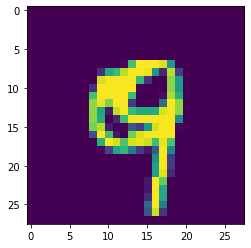

In [14]:
plt.imshow(x_test[image_index])
plt.show()

In [15]:
predicted=model.predict_classes(x_test)

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [17]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
print(confusion_matrix(y_test,predicted))

[[ 970    0    1    2    1    1    2    2    1    0]
 [   0 1124    3    2    0    0    2    0    4    0]
 [   2    3 1006    2    0    0    3    8    8    0]
 [   0    0    4  996    0    1    0    4    3    2]
 [   1    0    4    0  965    1    4    0    2    5]
 [   3    0    0   15    2  866    2    1    3    0]
 [   5    2    0    2    8    5  934    0    2    0]
 [   1    5    9    4    1    0    0 1003    2    3]
 [   3    0    2    5    5    4    3    2  948    2]
 [   1    6    0    7   14    8    0    6    5  962]]


In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.99      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

